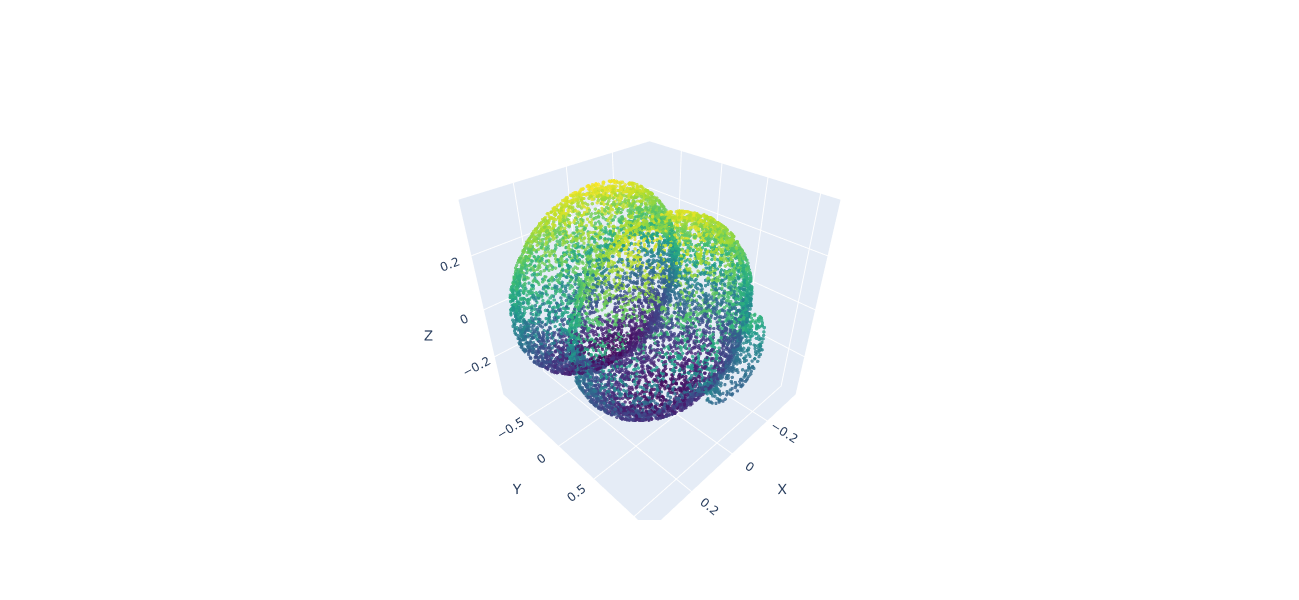

In [4]:
import numpy as np
import plotly.graph_objects as go

def visualize_point_cloud(filename):
    """Load and visualize point cloud with full mouse rotation control"""
    
    # Load and center data
    data = np.loadtxt(filename, delimiter=',')
    x = data[:, 0] - np.mean(data[:, 0])
    y = data[:, 1] - np.mean(data[:, 1]) 
    z = data[:, 2] - np.mean(data[:, 2])
    
    fig = go.Figure(data=[
        go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(
                size=2,
                color=z,
                colorscale='Viridis',
                opacity=0.8
            )
        )
    ])
    
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y', 
            zaxis_title='Z',
            aspectmode='cube',
            dragmode='orbit'  # Enables free mouse rotation
        ),
        width=800,
        height=600
    )
    
    return fig

# Usage
misclassified_folder = 'log/classification/pointnet2_cls_ssg/inference/misclassified'
filename = 'log/classification/pointnet2_cls_ssg/inference/misclassified/bottle/0_469_pred_vase_gt_bottle.txt'
fig = visualize_point_cloud(filename)
fig.show()
# fig.write_html(f'{filename}_interactive_visualization.html')